In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.callbacks import EarlyStopping

In [42]:
#한글 처리를 위해 폰트 설정
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [43]:
df=pd.read_csv('C:/Users/songh/Desktop/workspace/weather/기상대기정보.csv')

In [44]:
df.head()

,지점명,일시,지점,기온(°C),강수여부,풍속(m/s),풍향(16방위),습도(%),현지기압(hPa),해면기압(hPa),...,Ozon,NO2,CO,SO2,증기압(hPa),이슬점온도(°C),시정(10m),지면온도(°C),월,전날기온
0,철원,2018-08-02 01:00:00,95,28.2,0,1.0,50.0,79.0,987.3,1004.6,...,0.023,0.003,0.3,0.001,30.2,24.2,1522.0,27.7,8,25.0
1,철원,2018-08-02 02:00:00,95,27.3,0,0.7,90.0,85.0,987.5,1004.9,...,0.024,0.003,0.3,0.001,30.7,24.5,1346.0,26.8,8,24.2
2,철원,2018-08-02 03:00:00,95,26.5,0,0.4,0.0,87.0,987.8,1005.2,...,0.024,0.003,0.2,0.001,30.0,24.1,1072.0,26.2,8,23.6
3,철원,2018-08-02 04:00:00,95,26.1,0,1.0,70.0,91.0,987.9,1005.4,...,0.024,0.002,0.2,0.001,30.7,24.5,1125.0,25.7,8,23.7
4,철원,2018-08-02 05:00:00,95,26.5,0,0.6,140.0,90.0,988.4,1005.8,...,0.021,0.002,0.2,0.001,31.1,24.7,1329.0,25.4,8,22.9


In [45]:
df.columns

Index(['지점명', '일시', '지점', '기온(°C)', '강수여부', '풍속(m/s)', '풍향(16방위)', '습도(%)',
       '현지기압(hPa)', '해면기압(hPa)', '일조(hr)', '적설(cm)', '전운량(10분위)', 'PM10',
       'PM2.5', 'Ozon', 'NO2', 'CO', 'SO2', '증기압(hPa)', '이슬점온도(°C)', '시정(10m)',
       '지면온도(°C)', '월', '전날기온'],
      dtype='object')

In [46]:
# 당일 기온 저장
y_today = df['기온(°C)'].copy()

In [47]:
# 종속변수, 독립변수 분리
y = df['기온(°C)'].copy()
X = df[df.columns[4:]].copy()

In [48]:
y.drop(index=[0], inplace=True)
X.drop(index=[len(X)-1], inplace=True)

In [49]:
y = y.reset_index(drop=True)

In [50]:
X['전날기온']=y_today.drop(index=[len(y_today)-1])

In [51]:
# 범위형 변수 제거
X.drop(columns=['풍향(16방위)', '전운량(10분위)', '월'], axis=1, inplace=True)

In [52]:
# 더미변수 생성
X=pd.get_dummies(data=X, columns=['강수여부'])

In [53]:
scaler = StandardScaler()
scaler.fit(X.iloc[:,:-2])
X_scaled = scaler.transform(X.iloc[:,:-2])
X_scaled = pd.DataFrame(X_scaled)
X_scaled.columns = ['풍속(m/s)', '습도(%)', '현지기압(hPa)', '해면기압(hPa)', '일조(hr)', '적설(cm)', 'PM10', 'PM2.5', 
                    'O3', 'NO2', 'CO', 'SO2', '증기압(hPa)', '이슬점온도(°C)', '시정(10m)', '지면온도(°C)', '전날기온']
X_scaled = pd.concat([X_scaled, X.iloc[:,-2:]], axis=1)
X_scaled

,풍속(m/s),습도(%),현지기압(hPa),해면기압(hPa),일조(hr),적설(cm),PM10,PM2.5,O3,NO2,CO,SO2,증기압(hPa),이슬점온도(°C),시정(10m),지면온도(°C),전날기온,강수여부_0,강수여부_1
0,-0.543789,0.446784,-1.147573,-1.434567,-0.645615,-0.070183,-0.019538,-0.005901,-0.525180,-0.874219,-0.547369,-1.069525,1.997825,1.491758,-0.335595,1.010295,1.480713,1,0
1,-0.725001,0.724630,-1.134416,-1.398730,-0.645615,-0.070183,0.151909,0.123778,-0.472110,-0.874219,-0.547369,-1.069525,2.055109,1.517753,-0.482682,0.937277,1.391530,1,0
2,-0.906213,0.817245,-1.114680,-1.362893,-0.645615,-0.070183,-0.053827,-0.031837,-0.472110,-0.874219,-1.048907,-1.069525,1.974911,1.483092,-0.711671,0.888598,1.312256,1,0
3,-0.543789,1.002476,-1.108101,-1.339002,-0.645615,-0.070183,-0.019538,-0.005901,-0.472110,-0.966011,-1.048907,-1.069525,2.055109,1.517753,-0.667378,0.848033,1.272619,1,0
4,-0.785405,0.956168,-1.075209,-1.291220,-0.645615,-0.070183,0.151909,0.123778,-0.631320,-0.966011,-1.048907,-1.069525,2.100937,1.535083,-0.496890,0.823694,1.312256,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1933327,-0.664597,-1.081369,1.194388,1.420429,-0.645615,-0.070183,-0.739614,-0.421114,0.323936,-0.507052,0.455707,0.057103,-1.038248,-1.177082,2.571060,-1.172123,-0.927230,1,0
1933328,-0.362577,-0.942446,1.247016,1.515994,-0.645615,-0.070183,-0.705324,-0.524617,0.217797,-0.415260,0.455707,0.057103,-1.015334,-1.133756,2.571060,-1.204576,-0.956957,1,0
1933329,-0.241769,-0.710908,1.247016,1.527940,-0.645615,-0.070183,-0.671035,-0.489956,0.058587,-0.139884,0.455707,0.057103,-0.980963,-1.038441,1.854007,-1.269480,-0.976776,1,0
1933330,-0.181365,-0.525677,1.279909,1.587668,-0.645615,-0.070183,-0.602456,-0.489956,0.217797,-0.507052,0.455707,0.057103,-0.958049,-0.977785,1.162862,-1.318159,-1.006504,1,0


In [54]:
X_scaled.columns

Index(['풍속(m/s)', '습도(%)', '현지기압(hPa)', '해면기압(hPa)', '일조(hr)', '적설(cm)',
       'PM10', 'PM2.5', 'O3', 'NO2', 'CO', 'SO2', '증기압(hPa)', '이슬점온도(°C)',
       '시정(10m)', '지면온도(°C)', '전날기온', '강수여부_0', '강수여부_1'],
      dtype='object')

In [55]:
# vif가 가장 높은 이슬점온도(°C) 제거
X_scaled.drop(columns=['이슬점온도(°C)'], axis=1, inplace=True)

In [56]:
X_scaled.drop(columns=['전날기온'], axis=1, inplace=True)

In [59]:
# 상관계수가 높은 PM2.5 제거
X_scaled.drop(columns=['PM2.5'], axis=1, inplace=True)

In [60]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_scaled.values, i) for i in range(X_scaled.shape[1])]
vif["features"] = X_scaled.columns
vif

,VIF Factor,features
0,1.272079,풍속(m/s)
1,3.142436,습도(%)
2,1.499669,현지기압(hPa)
3,3.467886,해면기압(hPa)
4,2.067843,일조(hr)
5,1.014090,적설(cm)
6,1.289599,PM10
7,2.046962,O3
8,2.064056,NO2
9,1.661191,CO


In [61]:
model = sm.OLS(y, X_scaled)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 기온(°C)   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                 1.827e+06
Date:                Tue, 28 Mar 2023   Prob (F-statistic):               0.00
Time:                        22:51:27   Log-Likelihood:            -4.5835e+06
No. Observations:             1933332   AIC:                         9.167e+06
Df Residuals:                 1933316   BIC:                         9.167e+06
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
풍속(m/s)       -0.2164      0.002   -102.981      0.000      -0.221      -0.212
습도(%)         -1.3063      0.003   -395.543      0.000      -1.313      -1.300
현지기압(hPa)      0.2154      0.002     94.408      0.000       0.211       0.220
해면기압(hPa)     -0.9565      0.003   -275.704      0.000      -0.963      -0.950
일조(hr)        -0.3036      0.003   -113.308      0.000      -0.309      -0.298
적설(cm)        -0.2676      0.002   -142.650      0.000      -0.271      -0.264
PM10           0.1270      0.002     60.032      0.000       0.123       0.131
O3             0.3936      0.003    147.655      0.000       0.388       0.399
NO2            0.4988      0.003    186.366      0.000       0.494       0.504
CO            -0.1307      0.002    -54.427      0.000      -0.135      -0.126
SO2           -0.1076      0.002    -51.429      0.000      -0.112      -0.104
증기압(hPa)       4.6132      0.005    937.235      0.000       4.604       4.623
시정(10m)        0.0059      0.002      2.745      0.006       0.002       0.010
지면온도(°C)       5.4486      0.005   1176.402      0.000       5.439       5.458
강수여부_0        13.2820      0.002   6876.425      0.000      13.278      13.286
강수여부_1        12.8749      0.008   1592.696      0.000      12.859      12.891
==============================================================================
Omnibus:                   239363.563   Durbin-Watson:                   0.218
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           673408.783
Skew:                          -0.680   Prob(JB):                         0.00
Kurtosis:                       5.551   Cond. No.                         8.11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
X_train, X_test, y_train, y_test=train_test_split(X_scaled, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val=train_test_split(X_train, y_train, test_size=0.1, random_state=0)
print(X_train.shape, X_test.shape, X_val.shape)

(1391998, 16) (386667, 16) (154667, 16)


In [63]:
%%time
lin_reg = LinearRegression()
model_lin = lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
rms = np.sqrt(mean_squared_error(y_test, y_pred))
rms

Wall time: 932 ms


2.588573861396947

In [72]:
print('훈련용:',model_lin.score(X_train, y_train))
print('검증용:',model_lin.score(X_test, y_test))
print('예측용:',model_lin.score(X_val, y_val))

훈련용: 0.9341058319370741
검증용: 0.9340888232034034
예측용: 0.9341859721383922


In [65]:
%%time
# 결정나무모델
tree_reg = DecisionTreeRegressor(criterion = 'squared_error', 
                                 splitter='best',
                                 max_depth=14,
                                 min_samples_leaf=10,
                                 random_state=0)
model_tree = tree_reg.fit(X_train, y_train)
y_pred = tree_reg.predict(X_test)
rms = np.sqrt(mean_squared_error(y_test, y_pred))
rms

Wall time: 13.2 s


1.1453323535329565

In [73]:
print('훈련용:',model_tree.score(X_train, y_train))
print('검증용:',model_tree.score(X_test, y_test))
print('예측용:',model_tree.score(X_val, y_val))

훈련용: 0.9884563161569282
검증용: 0.9870966938828492
예측용: 0.9871728312294105


In [67]:
%%time
# 랜덤포레스트
forest_reg=RandomForestRegressor(random_state=0, n_jobs=-1) #CPU full 사용
model_forest = forest_reg.fit(X_train, y_train)
y_pred=forest_reg.predict(X_test)
rms=np.sqrt(mean_squared_error(y_test, y_pred))
rms

Wall time: 10min


0.9814109871679801

In [68]:
print('훈련용:',model_forest.score(X_train, y_train))
print('검증용:',model_forest.score(X_test, y_test))
print('예측용:',model_forest.score(X_val, y_val))

훈련용: 0.9986670825705177
검증용: 0.9905258605204281


KeyboardInterrupt: 

In [135]:
pd.DataFrame([np.array(y_val), model_forest.predict(X_val)])

,0,1,2,3,4,5,6,7,8,9,...,154657,154658,154659,154660,154661,154662,154663,154664,154665,154666
0,17.200,8.400,26.300,4.900,9.900,-7.700,20.200,7.700,7.200,2.600,...,20.700,21.200,-13.100,19.600,6.400,2.400,5.800,18.200,4.6,26.400
1,12.638,6.388,24.499,5.192,9.916,-5.156,19.564,7.223,8.246,5.646,...,22.172,26.637,-10.087,14.378,9.618,1.785,4.069,19.653,3.4,27.244


In [71]:
%%time
#RandomizedSearchCV() 최근에 많이 사용되고 있는 파라미터 최적화 함수
#매개변수의 범위를 지정해주면 무작위로 매개변수를 조합하여 최적의 성능 측정
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
param_distribs={
 'n_estimators': randint(low=1, high=100),
 'max_features': randint(low=1, high=8),
 }
rnd_search=RandomizedSearchCV(forest_reg, param_distributions=param_distribs, n_iter=50, cv=5, random_state=0, n_jobs=-1)
rnd_search.fit(X_train, y_train)


C:\Users\songh\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


MemoryError: Unable to allocate 8.50 MiB for an array with shape (1113599,) and data type int64

In [40]:
cvres=rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"],cvres["params"]):
    print(np.sqrt(mean_score), params)

AttributeError: 'RandomizedSearchCV' object has no attribute 'cv_results_'

In [ ]:
%%time
model_RSCV_forest=rnd_search.best_estimator_
y_pred=model_RSCV_forest.predict(X_test)
rms=np.sqrt(mean_squared_error(y_test, y_pred))
rms

In [ ]:
print('훈련용:',model_RSCV_forest.score(X_train, y_train))
print('검증용:',model_RSCV_forest.score(X_test, y_test))
print('예측용:',model_RSCV_forest.score(X_pred, y_pred))

In [33]:
# 인공신경망
model = Sequential()
model.add(Dense(36, input_shape=(len(X_train.columns),), activation='relu', name='input'))
model.add(Dense(18, activation='relu', name='hidden-1'))
model.add(Dense(9, activation='relu', name='hidden-2'))
model.add(Dense(1, name='output')) #항등함수
model.compile(loss='mse', optimizer='adam', metrics='mse')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (Dense)               (None, 36)                540       
                                                                 
 hidden-1 (Dense)            (None, 18)                666       
                                                                 
 hidden-2 (Dense)            (None, 9)                 171       
                                                                 
 output (Dense)              (None, 1)                 10        
                                                                 
Total params: 1,387
Trainable params: 1,387
Non-trainable params: 0
_________________________________________________________________


In [40]:
%%time
np.random.seed(1234)
early_stopping = EarlyStopping(monitor='val_loss', patience=7)
hist = model.fit(X_scaled, y, epochs=500, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/500
48334/48334 [==============================] - 64s 1ms/step - loss: 9.0637 - mse: 9.0637 - val_loss: 9.2224 - val_mse: 9.2224
Epoch 2/500
44186/48334 [==========================>...] - ETA: 4s - loss: 9.0478 - mse: 9.0478

KeyboardInterrupt: 

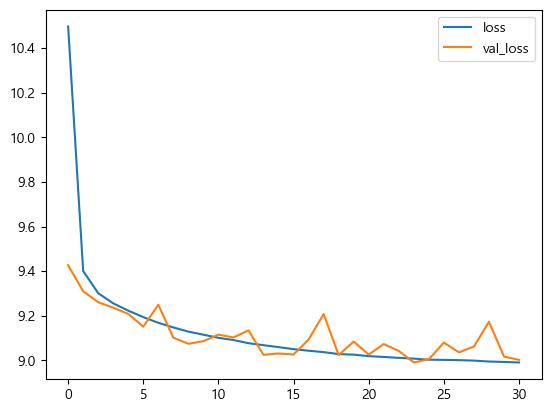

In [35]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

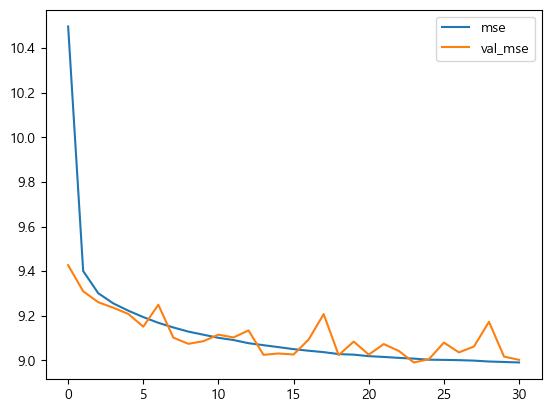

In [36]:
plt.plot(hist.history['mse'])
plt.plot(hist.history['val_mse'])
plt.legend(['mse', 'val_mse'])
plt.show()

In [37]:
scores = model.evaluate(X_train, y_train)
print(scores)
scores = model.evaluate(X_test, y_test)
print(scores)

42292/42292 [==============================] - 39s 923us/step - loss: 8.9763 - mse: 8.9763
[8.976320266723633, 8.976320266723633]
18125/18125 [==============================] - 18s 998us/step - loss: 9.0201 - mse: 9.0201
[9.020102500915527, 9.020102500915527]


In [38]:
from sklearn.metrics import r2_score
pred = model.predict(X_test)
r2_score(y_test, pred)

18125/18125 [==============================] - 14s 780us/step


0.9113426889256729